In [2]:
%pip install scikit-learn 


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [4]:
columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
df = pd.read_csv("MICRODADOS_ENEM_2022.csv", sep=";", encoding="ISO-8859-1", usecols=columns)
print(df.shape)
print(df.head())

(3476105, 5)
   NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO
0         NaN         NaN         NaN         NaN              NaN
1         NaN         NaN         NaN         NaN              NaN
2       421.1       546.0       498.8       565.3            760.0
3       490.7       388.6       357.8       416.0            320.0
4         NaN         NaN         NaN         NaN              NaN


In [5]:
df.dropna(inplace=True, subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO'])
df = df.sample(n=100000)
y = df['NU_NOTA_REDACAO']
x = df.drop(axis=1, columns="NU_NOTA_REDACAO")

Dividindo os dados em treino e teste

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(len(y_train))
print(len(y_test))

80000
20000


In [7]:
rf_regressor = DecisionTreeRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [7]:
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Best Root Mean Squared Error: {rmse_best}')

Best Root Mean Squared Error: 244.05532159737882


Text(0.5, 1.0, 'valores reais x preditos')

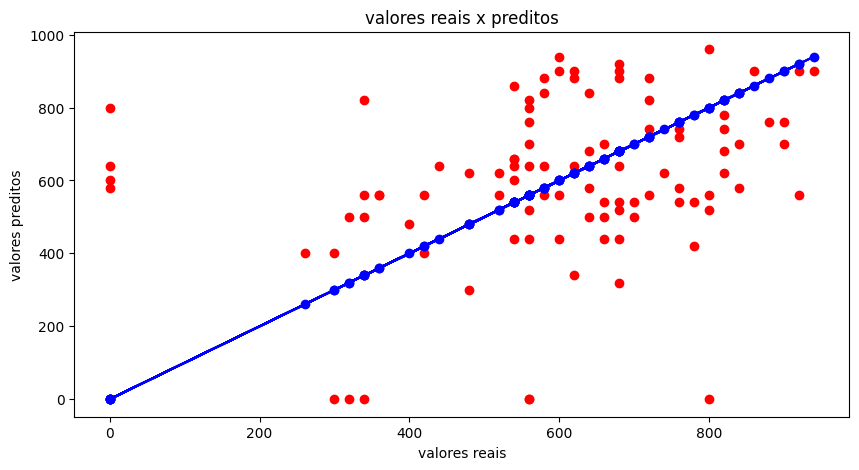

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], y_test[:100], label='Line Plot', color='blue', marker='o')
plt.scatter(y_test[:100], y_pred[:100], label='Scatter Plot', color='red')
plt.xlabel('valores reais')
plt.ylabel('valores preditos')
plt.title('valores reais x preditos')
# plt.grid(True)